# <center> Estatistica Descritiva Basica em Pytrhon </center>

## Basic ToolBox - Estatistica Descritiva II

In [87]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
from collections import Counter
from scipy.stats import bernoulli

# Associação Entre Variáveis ``Quantitativas``


## Correlação de  Pearson

A segunda combinação possível é quando nos deparamos com ``duas variáveis quantitativas``, sejam elas **discretas** ou **contínuas**. Nesse sentido, há um ganho de métodos e visualizações em relação as associações entre variaveis qualitativas.

O ``Coeficiente de correlação de Pearson`` é uma **medida adimensional** que pode assumir valores no intervalo **entre -1 e +1**. O coeficiente **mede a intensidade** e a **direção** de relações lineares. A intensidade diz respeito ao`` grau de relacionamento`` entre duas variáveis.

A ``correlação de Pearson`` **mede** como **duas variáveis quantitativas** estão relacionadas de maneira linear, ou seja, se elas **aumentam** ou **diminuem** juntas.

O ``coeficiente de correlação de Pearson``, também chamado de **coeficiente de correlação produto-momento** ou simplesmente de ``ρ de Pearson`` mede o **grau da correlação** entre **duas variáveis de escala métrica**. Este coeficiente, normalmente representado por ``ρ`` assume apenas valores entre ``-1`` e ``1``.

Uma das formas de **analisar visualmente a relações entre variáveis quantiativas** é por meio de ``gráficos de dispersão``. Vamos analisar a relação entre o **tempo de serviço** de agentes de uma companhia de seguros e seu **número de clientes**.

In [88]:
# Carregando DataFrame para Exemplificação
df_anos_servicos_clientes = pd.read_csv('correlacao1.csv', sep = ";")
df_anos_servicos_clientes.head()

,tempo_de_serviço,numero_de_clientes
0,1,200
1,1,205
2,1,200
3,1,220
4,1,230


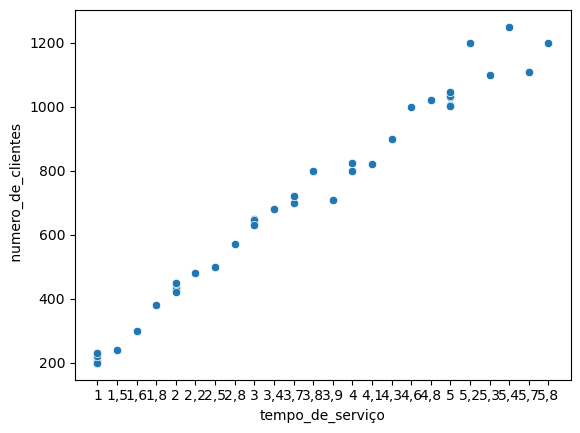

In [89]:
# Plotando um grafico de dispersão "Tempo de Serviço" vs "Nº de Clientes"
sns.scatterplot(data=df_anos_servicos_clientes, x='tempo_de_serviço', y=' numero_de_clientes')
plt.show()
# Existe uma relação aparentemente "forte e positiva"

Parece haver alguma relação positiva entre o **tempo** e o **número de clientes**. Nesse caso, quanto maior o tempo de serviço, mais clientes os agentes possui.

In [90]:
# Carregando DataFrame para Exemplificação
df_renda_saude = pd.read_csv('correlacao3.csv', sep = ";")
df_renda_saude.head()

,renda,gasto_saude
0,2000,500
1,2000,470
2,2200,470
3,2800,450
4,3000,456


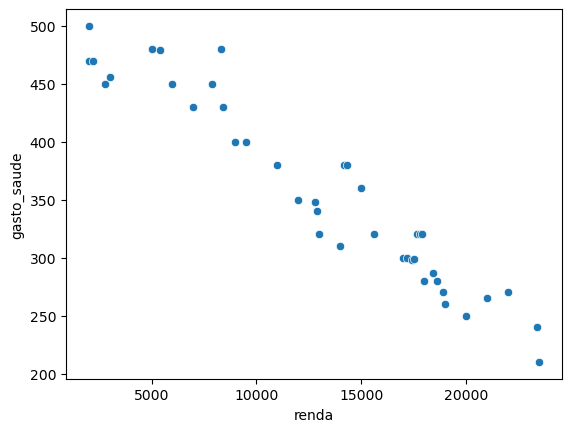

In [91]:
# Plotando um grafico de dispersão "renda" vs "gasto_saude"
sns.scatterplot(data=df_renda_saude, x='renda', y='gasto_saude')
plt.show()
# Existe uma relação aparentemente "forte e negativa"

Nesse exemplo, podemos ver uma **relação inversa**, pois quanto maior a renda familiar (em salários mínimos), menor é a tendência de se gastar com assistência médica **(% da renda anual)**

In [92]:
# Carregando DataFrame para Exemplificação
df_resultado_tempo = pd.read_csv('correlacao2.csv', sep = ';')
df_resultado_tempo.head()

,resultado,tempo
0,"134,4548774",2700
1,"500,6073562",2800
2,"450,2982568",4600
3,"561,7147389",4100
4,"238,6563412",2600


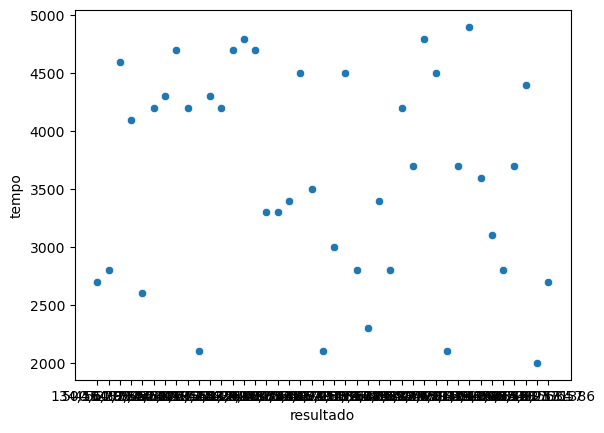

In [93]:
# Plotando um grafico de dispersão "resultado" vs "tempo"
sns.scatterplot(data=df_resultado_tempo, x="resultado", y='tempo')
plt.show()
# Não Existe uma Relação Aparentemente entre as Variaveis

Note que, **contrariamente aos outros dois gráficos**, parece **não haver relação** muito clara entre as variáveis, isto é, conhecer o resultado do teste de língua estrangeira não nos traz muita informação sobre o tempo que cada operador leverá para operar a máquina.

Nesse tipo de situação, existe **pouca ou nenhuma associação**. Mas mesmo que ``qualitativamente`` tenhamos identificado alguns padrões, não dá para saber, por exemplo, qual associação é mais forte ou fraca.

Para isso, vamos investigar uma estatística que nos ajudará a quantificar essas relações: **A correlação**.

Existem muitos tipos de associação, inicialmente vamos focar em entender a mais simples delas, que é a linear. Isto é, iremos definir uma medida que avalia o quanto a nuvem de pontos que estamos observando se aproximam de uma reta. Como propriedade importante, a ``correlação linear`` sempre estará dentro de um intervalo de ``-1 a 1``.

In [94]:
# criando nuvens de pontos para exemplificação
x = np.linspace(-1,1,100)
y1 = 2*x + np.random.normal(0, 1,len(x))
y2 = -2*x + np.random.normal(0, 1,len(x))
y3 = np.random.normal(0, 1,len(x))

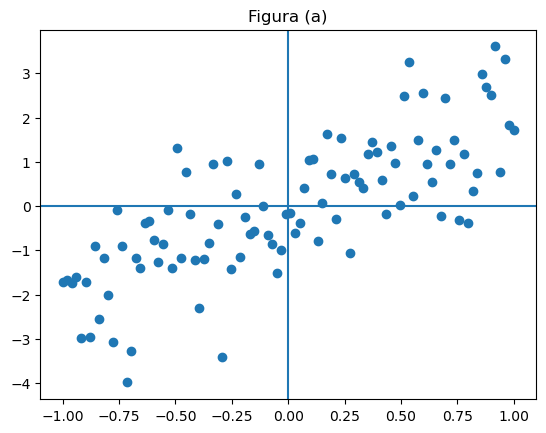

In [95]:
# Plotando um grafico de dispersão
plt.scatter(x,y1)
plt.title('Figura (a)')
plt.axhline(0)
plt.axvline(0)
plt.show()
# Correlação Media e Positiva

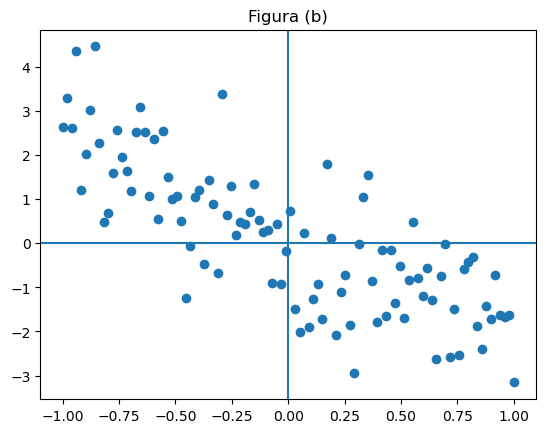

In [96]:
# Plotando um grafico de dispersão 
plt.scatter(x,y2)
plt.title('Figura (b)')
plt.axhline(0)
plt.axvline(0)
plt.show()
# Correlação Media e Negativa

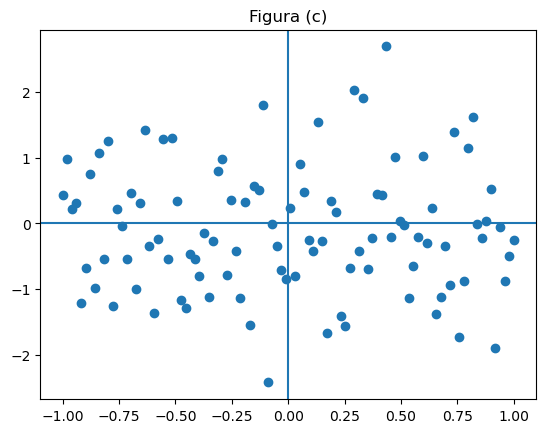

In [97]:
# Plotando um grafico de dispersão 
plt.scatter(x,y3)
plt.title('Figura (c)')
plt.axhline(0)
plt.axvline(0)
plt.show()
# Não existe correlçao

Na ``figura (a)``, vemos uma **associação linear** (se aproxima de uma reta) e **positiva**. Note que a maioria dos pontos estão localizados nos **quadrantes 1 e 3**. 

Nesses **quadrantes**, as ``coordenadas (x,y)`` dos pontos possuem o mesmo sinal e, portanto, o produto entre elas é sempre **positivo**. Se somássemos o produto de todos as coordenadas de todos os pontos, a soma seria positiva, por haver mais pontos localizados nessas regiões.

De maneira análoga, na ``figura (b)`` temos o **inverso da Figura (a)**, mais pontos nos **quadrantes 2 e 4**. Neles, as coordenadas dos pontos possuem sinais distinto e, dessa forma, os produtos resultarão em um **número negativo**. Nesse caso, havendo mais pontos presentes nessas regiões, as somas desses produtos resultaria em um **número negativo**.

Por fim, podemos ver que a ``Figura (c)`` possui pontos espalhados por todos os quadrantes. Dessa forma, se somarmos os produtos das coordenadas, teremos um valor **próximo a zero**, pois cada ponto positivo possui seu correspondente simétrico e acabará cancelando na soma.

Embora poderoso, o método da correlação de pearson pode trazer alguns pontos negativos e aos quais devemos estar atentos.

NÃO OLHE APENAS OS NÚMEROS CORRELAÇÃO NÃO IMPLICA CAUSA

Vimos a **correlação de Pearson** e como ela pode ser calculada com numpy e pandas. Agora, será introduzido um **novo meio de medir essa relação**, que apresenta algumas vantagens. Vimos que a **correlação de pearson varia de -1 a 1** e que esta **mede a relação linear** entre ``variáveis quantitativas``. Mas e se a **relação não for linear**? Bom, aí podemos utilizar a ``correlação de Spearman``.

# Correlação de Spearman

O ``Coeficiente de Correlação por Postos de Spearman``, é uma medida não paramétrica da dependência dos postos das variáveis.A correlação de Spearman é muito usada para avaliar relações envolvendo variáveis ordinais. Por exemplo, você poderia usar a correlação de Spearman para avaliar se a ordem na qual os funcionários executam um teste está relacionada ao número de meses de emprego.

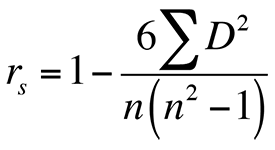

O ``coeficiente de correlação de Spearman`` é uma medida não paramétrica da correlação de postos (dependência estatística do ranking entre duas variáveis). É usado principalmente para análise de dados. Meça a força e direção da associação entre duas variáveis classificadas

Para calcular a correlação de Spearman, vamo seguir o passo a passo:
    
<ol>
    <li> Extrair o ranking de valores para as variáveis </li>
    <li> Calcular a distância dos rankings </li>
    <li> Calcular a distância ao quadrado</li>
    <li> Aplicar a equação de Spearman </li>
</ol>

In [98]:
# Gerando Dados para Exemplificação
df_spearman = pd.DataFrame({'x':[73, 76, 78, 65, 86, 82, 91],
                            'y':[77, 78, 79, 80, 86, 89, 95]})
display(df_spearman)

,x,y
0,73,77
1,76,78
2,78,79
3,65,80
4,86,86
5,82,89
6,91,95


``1``. **Extrair o ranking de valores para as variáveis**

## ``rank`` DataFrame Pandas

* Calcule classificações de dados numéricos (1 a n) ao longo do eixo. Por padrão, valores iguais recebem uma classificação que é a média das classificações desses valores.

In [99]:
# Extrair o ranking de cada valor em relação às suas respectivas colunas.
df_spearman['x_rank'] = df_spearman['x'].rank(ascending=False)
df_spearman['y_rank'] = df_spearman['y'].rank(ascending=False)

In [100]:
display(df_spearman)

,x,y,x_rank,y_rank
0,73,77,6.0,7.0
1,76,78,5.0,6.0
2,78,79,4.0,5.0
3,65,80,7.0,4.0
4,86,86,2.0,3.0
5,82,89,3.0,2.0
6,91,95,1.0,1.0


``2`` **Calcular a distância dos rankings**

In [101]:
# Obter as diferenças de ranking por linhas.
df_spearman['d'] = df_spearman['x_rank'] - df_spearman['y_rank']
# Coluna "d" = Diferença

In [102]:
display(df_spearman)

,x,y,x_rank,y_rank,d
0,73,77,6.0,7.0,-1.0
1,76,78,5.0,6.0,-1.0
2,78,79,4.0,5.0,-1.0
3,65,80,7.0,4.0,3.0
4,86,86,2.0,3.0,-1.0
5,82,89,3.0,2.0,1.0
6,91,95,1.0,1.0,0.0


``3``. **Calcular a distância ao quadrado**

In [103]:
# Obtendo a distancia ao quadrado
df_spearman['d2'] = df_spearman['d']**2
# coluna "d2" = Diferença ao Quadrado

In [104]:
display(df_spearman)

,x,y,x_rank,y_rank,d,d2
0,73,77,6.0,7.0,-1.0,1.0
1,76,78,5.0,6.0,-1.0,1.0
2,78,79,4.0,5.0,-1.0,1.0
3,65,80,7.0,4.0,3.0,9.0
4,86,86,2.0,3.0,-1.0,1.0
5,82,89,3.0,2.0,1.0,1.0
6,91,95,1.0,1.0,0.0,0.0


``4``. **Aplicar a equação de Spearman**

<img src="https://bloqm.files.wordpress.com/2013/10/rho-de-spearman.jpg" height=300 width=300>

In [105]:
# Soma de todos as diferenças ao quadrado
sum_d2 = df_spearman['d2'].sum()

# Nº Total de elementos no conjunto de dados
n = len(df_spearman)

# Aplicando a Equação de Spearman
rs = 1 - (6*sum_d2)/(n*(n**2 -1))

In [106]:
# Visualizando o "Coeficiente de Correlação de Spearman"
print(rs)

0.75


## ``corr`` DataFrame Pandas

* Calcule a correlação de pares de colunas, excluindo valores NA/nulos.

In [107]:
# Tabela de Correlação com o "metodo de Correlçao de Spearman"
display(df_spearman[['x', 'y']].corr(method = 'spearman'))

,x,y
x,1.00,0.75
y,0.75,1.00


In [108]:
# Tabela de Correlação com o "metodo de Correlçao de Pearson"
display(df_spearman[['x', 'y']].corr(method='pearson'))

,x,y
x,1.000000,0.806167
y,0.806167,1.000000


# ``Spearman`` Vs ``Pearson``

## Não Linearidade

Vamos ver como **Spearman** consegue captar padrões que **Pearson** deixa **passar**

In [109]:
# Criando uma variável independente para exemplificação
x = np.arange(-10,10)

In [110]:
# Criando uma variável dependente (curva expoencial) para exemplificação
y = np.exp(x)

In [111]:
# Carrendo dados em um DataFrame para exemplificação
df_correlations = pd.DataFrame({'x':x, 'y':y})

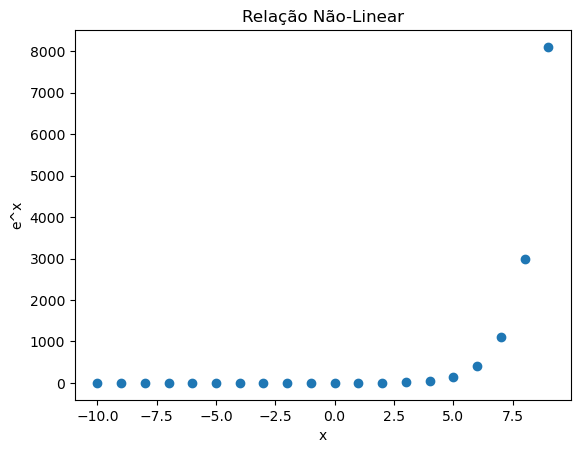

In [112]:
# Plotando Grafico de dispersão "y vs x"
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('e^x')
plt.title('Relação Não-Linear')
plt.show()

In [113]:
# Obtendo Coeficiênte de "Correlação de Pearson"
display(df_correlations.corr(method='pearson'))

,x,y
x,1.000000,0.538701
y,0.538701,1.000000


In [114]:
# Obtendo Coeficiênte de "Correlação de Spearman"
df_correlations.corr(method='spearman')

,x,y
x,1.0,1.0
y,1.0,1.0


Note que a ``correlação de Pearson`` **não consegue** captar uma **relação não-linear** tão bem quanto a de ``Spearman``.

# Outliers

``Outlier``, ``valor aberrante`` ou ``valor atípico``, é uma observação que apresenta um **grande afastamento** dos demais dados da série, ou que é **inconsistente** com os dados da série. A existência de ``outliers`` implica, tipicamente, em **prejuízos à interpretação** dos resultados dos testes estatísticos aplicados às amostras. 

Os ``outliers`` são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um ``outlier`` é um valor que foge da normalidade.

Quando existem ``outliers`` na amostra, a **correlação de pearson** é **fortemente afetada**, podendo resultar até mesmo numa **inversão de tendência**.

In [115]:
# Variável independente
x1 = np.arange(1,11)
# Variável dependente
y1 = -0.1*x1

In [116]:
x1 = np.append(x1, [30])
y1 = np.append(y1, [50])

In [117]:
df_correlations1 = pd.DataFrame({'x1':x1, 'y1':y1})

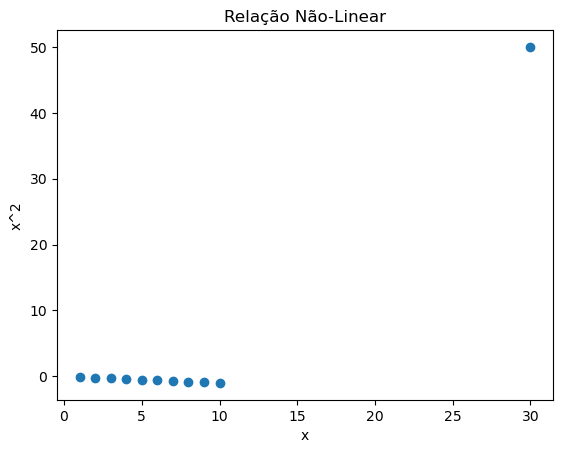

In [118]:
plt.scatter(x1, y1)
plt.xlabel('x')
plt.ylabel('x^2')
plt.title('Relação Não-Linear')
plt.show()

In [119]:
# correlação de pearson para x^2
df_correlations1.corr(method='pearson')

,x1,y1
x1,1.00000,0.92503
y1,0.92503,1.00000


In [120]:
# correlação de spearman para x^2
df_correlations1.corr(method='spearman')

,x1,y1
x1,1.0,-0.5
y1,-0.5,1.0


# Associação Entre Variáveis ``Qualitativas`` e ``Quantitativas``

Nossa última possível combinação entre natureza de variáveis é o caso de querermos medir relações entre uma ``variável qualitativa`` e uma ``variável quantitativa``. Para isso utilizaremos a ``correlação Point-Biserial`` e a ``análise de R2``.

## Correlação Point-Biserial


A ``correlaçao Point-Biserial`` é um caso particular da **correlação de Pearson**. É usada para casos em que se possui uma ``variável dicotômica`` (**2 valores possíveis**) e uma ``variável contínua``.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/790e9e1b2fd9213233a747036ff6b87efe4efb5e)

Assim como as demais correlações, a ``Point-Biserial varia de -1 a 1``. Na equação acima:

```M1```: **Média da variável contínua para o grupo 1**<br>
```M0```: **Média da variável contínua para o grupo 0**<br>
```n1```: **Número de observações do grupo 1**<br>
```n0```: **Número de observações do grupo 0**<br>
```n```:  **Número total de observações**<br>
```Sn```: **Desvio Padrão Populacional**<br>


Vamos criar uma **variável contínua**. Porém, vamos constituí-la de um **primeiro grupo**, **x1**, cuja **média é 10** e **desvio padrão é 10** e **outro grupo**,**x2**, cuja **média é 60** e **desvio padrão é 10**. Criaremos **100 amostras** para as quais a ``variável y`` corresponde a ``1`` e **100** para as quais a ``variável y é 0``.

In [121]:
# Criando um grupo fixo de numeros aleatorios
np.random.seed(10)

# 1º Criando uma Variavel independente
x1 = np.random.normal(10, 10, 100)

# 2º Criando uma Variavel independente
x2 = np.random.normal(60, 10, 100)

# Criando uma variavel dependente 
y = 100*[0] + 100*[1]

In [122]:
# Craindo um DataFrame com as variaveis criadas sinteticamente
df_pb = pd.DataFrame({'x':np.concatenate([x1,x2]), 'y':y})

In [123]:
# Visualizando DataFrame
display(df_pb.head())

,x,y
0,23.315865,0
1,17.152790,0
2,-5.454003,0
3,9.916162,0
4,16.213360,0


In [124]:
#  Obtendo a Média da variável contínua para o grupo 0
M0 = df_pb.groupby('y').mean().iloc[0,0]

# Obtendo a Média da variável contínua para o grupo 1
M1 = df_pb.groupby('y').mean().iloc[1,0]

# Obtendo o Desvio Padrão "Populacional"
std_ = df_pb['x'].std(ddof=0)

``ddof=0`` nos permitirá **calcular a variância de uma população**. Enquanto que, ``ddof=1``  nos permitirá **estimar a variância populacional** usando uma amostra de dados.

In [125]:
# Obtendo as medias de "y" em relação a "x"
df_pb.groupby('y').mean()

,x
y,
0,10.794167
1,60.691972


In [126]:
# Aplicando a equação Correlação Point-Biserial
print(((M1-M0)/std_)*np.sqrt(0.5**2))

0.931246752810707


A ``correlação Point-Biserial`` será numericamente igual a **Correlação de Pearson**.

In [127]:
# Aplicando a equação Correlação de Pearson.
df_pb.corr()

,x,y
x,1.000000,0.931247
y,0.931247,1.000000


# R2

A última **medida de associação entre as variáveis** que veremos é o ``R2``. O ``R2`` **quantifica o quanto, ``em %``, a variável independente ``X`` explica a variável dependete ``Y``**. E para isso, ele utiliza o conceito de **variância**. A lógica por trás desse cálculo é a seguinte:

Vamos **medir a variância** do nosso **conjunto de dados**`` Y``. Se a **variância** de ``Y``, quando olhada dentro de **grupos ``X``**, for menor, significa que ``X`` explica uma **parcela (%)** de ``Y``. Esse **%** é justamente nosso ``R2``.

Imagine a variável salário! Dentro de uma empresa o salário pode variar desde RS 5.000,00 a RS 100.000,00. Uma alta variabilidade, concorda? Mas se olharmos os grupos (cargos) separadamente, o salário tende a variar pouco entre os gerentes, C-Level, Tech Leads, pois cargos parecidos tendem a ganhar salários parecidos. Ou seja, a variabilidade diminui quando olhamos a variável salário pela perspectiva dos cargos.

In [128]:
# Gerando dados sintéticos para exemplificação, variáveis relacionado a salários, para cada cargo de engenharia

# Faixa Salarial de Estagiario
estg = np.random.choice(np.arange(1000, 2000), 100)

# Faixa Salarial de Eng. junior
eng_jr = np.random.choice(np.arange(4500, 7000), 100)

# Faixa Salarial de Eng.
eng = np.random.choice(np.arange(6500, 8000), 100)

# Faixa Salarial de Eng. Senior
eng_sr = np.random.choice(np.arange(7500, 11000), 100)

# Concatenando os Salários
salarios = np.concatenate([estg, eng_jr, eng, eng_sr])

In [129]:
# Gerando dados sintéticos relacionado aos cargos
cargo = 100*['estg'] + 100*['eng_jr'] + 100*['eng'] + 100*['eng_sr']

In [130]:
# Criando um DataFrame com os dados sintéticos para exemplificação
df_salario = pd.DataFrame({'Cargo':cargo, 'Salário':salarios})
display(df_salario.head())
print(df_salario.shape)

,Cargo,Salário
0,estg,1265
1,estg,1283
2,estg,1308
3,estg,1346
4,estg,1825


(400, 2)


In [131]:
# A variância será o desvio-padrão ao quadrado
var_total = (df_salario['Salário'].std())**2
print(round(var_total))

9028016


Agora iremos **calcular a variância** olhando pela perspectiva dos **cargos**. 

Para isso precisaremos de uma **medida-resumo**, que são, medidas de posição, as mais utilizadas são: a média, a mediana, a moda e os quartis da distribuição, e medidas de dispersão, as mais utlizadas são: são amplitude, desvio, variância e desvio padrão, e  no caso aqui aplicado, pode ser a **média**. 

Mas iremos **ponderar a média das variâncias** pelo **número de observações** de **cada grupo**.

In [132]:
# Variância em relação salario estagiario
var_estg = (estg.std())**2

# Variância em relação salario Eng. Junior
var_eng_jr = (eng_jr.std())**2

# Variância em relação salario Eng.
var_eng = (eng.std())**2

# Variância em relação salario Eng. Senior
var_eng_sr = (eng_sr.std())**2

In [133]:
# Combinação de Variancia de desvios ao quadrado
var_combinada = (100*var_estg + 100*var_eng_jr + 100*var_eng + 100*var_eng_sr) / 400

In [134]:
# Obtendo R²
(var_total - var_combinada) / var_total

0.9515712903675189

In [135]:
# Variancia de X maior que Y
var_total > var_combinada

True

# Distribuições de Probabilidade


Uma ``distribuição de probabilidade`` é um modelo matemático capaz de nos **fornecer a probabilidade de ocorrência** de um evento. Uma ``distribuição de probabilidade`` descreve o comportamento aleatório de um fenômeno dependente do acaso.

Uma ``distribuição de probabilidade`` relaciona um certo valor da variável em estudo com a sua **probabilidade de ocorrência**. A ``distribuição de probabilidades`` associa uma probabilidade a cada resultado numérico de um experimento, ou seja, dá a probabilidade de cada valor de uma variável aleatória.

A ``distribuição de probabilidade`` é uma medida muitas vezes vista como uma distribuição que descreve o comportamento de uma variável aleatória **discreta** ou **contínua**.

• Por exemplo, no lançamento de um dado cada face tem a mesma probabilidade de ocorrência que é 1/6.

Podemos classificar a **Distribuição de Probabilidade** em dois tipos:

* **Discreta**
* **Contínua**

As ``Distribuições de Probabilidade Discretas`` são utilizadas para modelar **variáveis contáveis**, como o número de gols numa partida de futebol (0,1,2,3,4...). Uma **distribuição discreta de probabilidade enumera cada valor possível** da variável aleatória, bem como **sua probabilidade**. Uma **distribuição discreta descreve a probabilidade de ocorrência de cada valor** de uma variável aleatória discreta. Uma variável aleatória discreta tem valores contáveis, como uma **lista de inteiros não negativos**.

As ``Distribuições de Probabilidade Contínuas``, por sua vez, são utilizadas quando queremos modelar **variáveis** cujas **ocorrências** podem estar associadas a **infinitos valores** dentro de um **intervalo**.  Exemplo: Temperatura. A temperatura de uma cidade pode assumir qualquer valor entre 10 e 20 graus, seja ele 10.1, 10.2, 10.2123, 10.2345, e assim por diante. São **infinitos valores possíveis**.

## Distribuições Discretas

* **Uniforme**

Quando os valores possíveis para um evento possuírem igual probabilidade de ocorrência, dizemos que estes seguem uma distribuição uniforme.

Exemplo: O lançamento de um dado não viciado.

Um dado possui **6 lados** e, se não estiver viciado, cada face possuirá **igual probabilidade** de ocorrer em um lançamento. Nesse caso, o modelo matemático que descreve a probabilidade para as possíveis ocorrências é:

* ``P`` : É a **probabilidade**
* ``x`` : São os **valores possíveis** 
* ``n`` : É a **quantidade de elementos** possíveis de ocorrer.

Vamos simular o lançamento de um dado e observar a distribuição dos resultados obtidos.

In [136]:
# Criando um grupo fixo(semente) de numeros aleatorios
np.random.seed(100)

# Nº de Lançamentos
n = 100000

# Valor minimo
Vmin = 1

# Valor maximo
Vmax = 6 + 1

# Lançamentos aleatorios
lancamentos = np.random.randint(low=Vmin, high=Vmax, size=n)

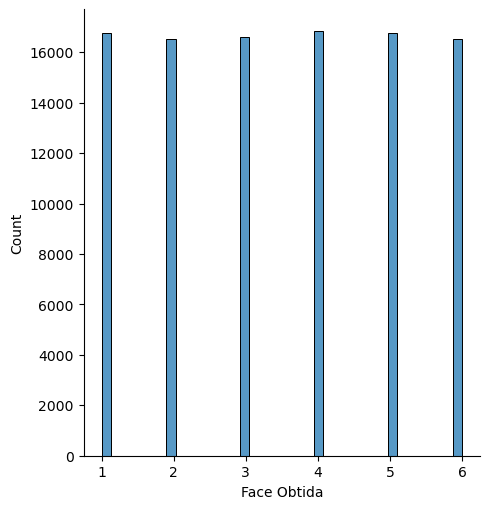

In [137]:
# Plotando o grafico de histograma
sns.displot(lancamentos, kde=False);
plt.xlabel('Face Obtida')
plt.show()
# O Grafico mostra uma "distribuição normal", pois cada face ocorre um Nº proximos de vezes

In [138]:
df_lancamentos = pd.DataFrame(lancamentos, columns=['Face'])

# Obtendo o numero de vezes de cada face
display(df_lancamentos.groupby('Face').size())

Face
1    16755
2    16527
3    16593
4    16858
5    16750
6    16517
dtype: int64

In [139]:
# Obtendo o numero de vezes de cada face
df_lancamentos.value_counts()

Face
4       16858
1       16755
5       16750
3       16593
2       16527
6       16517
Name: count, dtype: int64

## Dist. de Prob. Discreta de Bernoulli

A ``distribuição de Bernoulli`` é uma outra **distribuição discreta**, cujo propósito é **avaliar a probabilidade de sucesso** de um evento. Por sucesso, fala-se em um **evento de interesse** do pesquisador. A **probabilidade de sucesso** do evento é ``p`` e a **probabilidade de fracasso** é ``1 - p``.

Um exemplo bastante comum dessa distribuição envolve o lançamento de uma moeda, em que dar ``coroa`` pode ser o **evento de sucesso** com **probabilidade** ``p`` e dar ``cara`` pode ser o **evento de fracasso**, de probabilidade ``1 - p``. Quando a moeda não é viciada, espera-se que ``p = 0.5``. 

Porém, há uma série de aplicações bastante conhecidas e definidas que utilizam ``distribuição de bernoulli``, tais como:

* Ramo de Seguros
* Ramo de Crédito

A ``distribuição de Bernoulli``, a **média é sempre a probabilidade de sucesso** ``p``, e a  variância é ``p(1-p)``

Para simular um evento que segue uma **distribuição de Bernoulli**, usamos a biblioteca **scipy** e o módulo ``scipy.stats.bernoulli``

In [140]:
# Atribuindo a uma variavel a "Distribuição de Discreta de Bernoulli"
Dist_Bern = bernoulli.rvs(
    p = 0.7, # Probabilidade de Sucesso
    size = 100000,  # Nº de Experimentos (Quantidade de Ocorrencia)
    loc = 0, # Fracasso
    random_state = 12) # Seed

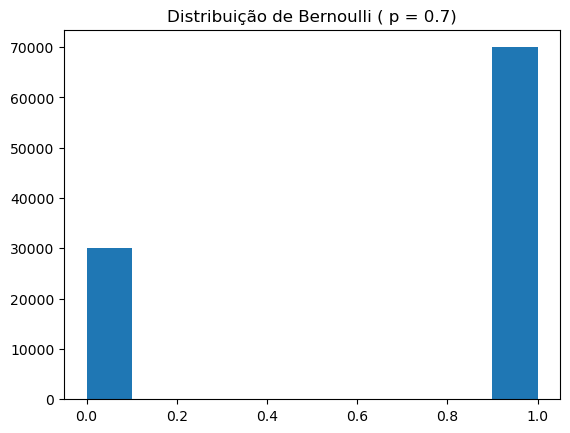

In [141]:
plt.hist(Dist_Bern)
plt.title('Distribuição de Bernoulli ( p = 0.7)')
plt.show()

In [142]:
# Média da Distribuição ( Valor de  p =  probabilidade de sucesso)
Dist_Bern.mean()

0.69962

In [143]:
# Variancância da Dsitribuição ( Valor p(1 -p) =  probabilidade de fracasso)
Dist_Bern.std()**2

0.21015185560000002

In [144]:
# Aplicando a equação de fracasso para confirmar 

# Probabilidade de sucesso
p = Dist_Bern.mean()

# Probabilidade de fracasso
p*(1-p)

0.2101518556

## Distribuição binomial


Agora, imagine que repetimos um **ensaio de bernoulli** (o lançamento de uma moeda, por exemplo) um **número ``n`` de vezes**. A quantidade de **vezes que obtivemos sucesso** nos ``n`` ensaios resultaram em uma **probabilidade**. Em resumo, a ``Distribuição Binomial`` é uma distribuição de probabilidade discreta que descreve o número de sucessos em uma sequência de ensaios independentes, em que cada ensaio tem apenas dois possíveis resultados.1

A ``distribuição binomial`` é a **distribuição de probabilidade discreta** do **número de sucessos** numa **sequência** de ``n`` tentativas tais que: Cada tentativa tem exclusivamente como resultado **duas possibilidades**, ``sucesso`` ou ``fracasso``. Cada tentativa é independente das demais

**Exemplo**: Qual a probabilidade de obtermos 2 caras em 5 lançamentos de uma moeda não viciada ?

Se realizarmos ``m`` vezes os **5 lançamentos**, conseguimos construir uma **curva de probabilidade** e responder essa pergunta.

![](https://miro.medium.com/max/2100/1*WVD2_j2CJkb14LR7nVsvjw.jpeg)

In [145]:
# Nº de ensaios (Trial)
n_trials = 10000

# probabilidade de sucesso
p = 0.5

# numero de lançamentos em um trial
n_lancamentos = 5

In [146]:
# Lista para quardar os resultados
resultados_trial = []

# Criando um looping para cada ensaio
for i in range(n_trials):
    bernoulli_dist = bernoulli.rvs(p=p, # probabilidade de sucesso
                               size=n_lancamentos, # numero de experimentos
                               loc=0) # fracasso
    resultados_trial.append(sum(bernoulli_dist))

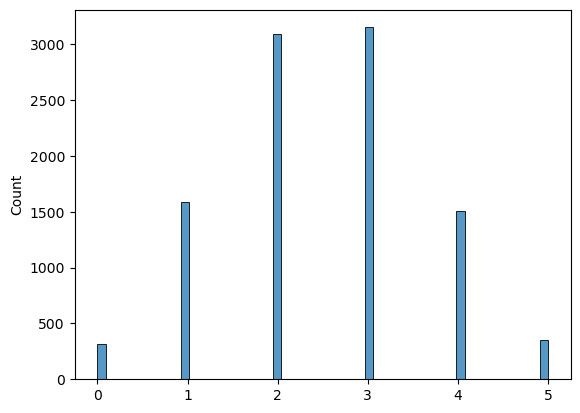

In [147]:
# Plotando um Histigrama para Visualizar a Distribuição
sns.histplot(resultados_trial,kde=False);
# Existem mais probabilidade de obter de 2 a 3 vezes coroa em 5 jogadas

### ``Counter`` Python

* dict subclasse para contar objetos 

### ``items`` Python

* Retorna um objeto de visualização (view) contendo os pares chave-valor do dicionário, como tuplas em uma lista

In [148]:
# Visualizando a contagem de vezes por cada resultado
Counter(resultados_trial).items()

dict_items([(4, 1507), (2, 3092), (1, 1584), (3, 3151), (5, 349), (0, 317)])

In [149]:
# Criando um DataFrame
df_trials = pd.DataFrame(Counter(resultados_trial).items(), columns=['Heads', 'Contagem'])

In [150]:
# Obtendo a Frequancia em %
df_trials['Frequência'] = df_trials['Contagem'] / 10000

In [151]:
display(df_trials)

,Heads,Contagem,Frequência
0,4,1507,0.1507
1,2,3092,0.3092
2,1,1584,0.1584
3,3,3151,0.3151
4,5,349,0.0349
5,0,317,0.0317


Também temos a **forma analítica** de construir uma **curva de probabilidade** para esse tipo de ensaio, utilizando a **equação** abaixo.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/9757f2616b6e9dffea51a6d9bcf9f958988063c3)

Onde:<br>

```n```: **Número de ensaios**<br>
```p```: **Probabilidade de Sucesso**<br>
```k```: **Número de sucessos**<br>

In [152]:
import math

In [153]:
#  Número de ensaios
n = 5 

# Probabilidade de Sucesso
p = 0.5

# Número de sucessos
k = 2

In [154]:
# Aplicando a equação relativa a função
probabilidade = (math.factorial(n) / (math.factorial(k) * math.factorial(n - k))) * (p**k) * (1 - p)**(n - k) 

In [155]:
# Visualizando a probabilidade de obter 2 caras em 5 jogadas
print(probabilidade)

0.3125


Note que para distribuições discretas, podemos associar diretamente um valor (observação) a uma probabilidade por meio de uma função matemática ou simulação. Essa função matemática se chama **Função de Massa de Probabilidade**.

**Exemplo de Aplicação**: Call Center

Imagine que você trabalha como cientista numa empresa de Call Center e você encontra as seguintes informações sobre a operação:

* A probabilidade de conversão de um cliente a cada ligação é **4%**
* Cada funcionário faz em **média 50 ligações** por dia
* A **receita média** que cada cliente traz é **RS 100.00**
* A empresa tem **100 funcionários** ligando para clientes
* Cada **funcionário recebe** um salário de **RS 200.00 por dia** de trabalho

Vocês conseguem imaginar os funcionários como distribuições binomiais?

Cada funcionário é uma distribuição binomial, cujo ``p`` = **4%** e ``n`` = **50**.

In [156]:
# Simulando Call Center

# Nº de Funcionarios
funcionarios = 100

# Salario dos Funcionarios
salarios = 200

# Nº de Ligações 
n_ligacoes = 50

# Probabilidade de Sucesso
p = 0.04

# Retorno de Receita por Sucesso
receita = 100

In [157]:
funcionarios * salarios

20000

In [158]:
# Criar uma Distribuição Binomial com os Parametros
np.random.seed(200)
sucessos_ligacoes = np.random.binomial(n_ligacoes, p, size = funcionarios)

# Métricas para o Call Center
print(f'Conversão Média {round(np.mean(sucessos_ligacoes), 2)}\n')
print(f'Receita Total (1 dia) R$ {np.sum(sucessos_ligacoes * receita)}\n')
print(f'Despesa com Funcionários (1 dia) R$ {(funcionarios * salarios)}\n')
print(f'Lucro de 1 dia R$ {np.sum(sucessos_ligacoes)*receita - funcionarios*salarios}')

Conversão Média 2.25

Receita Total (1 dia) R$ 22500

Despesa com Funcionários (1 dia) R$ 20000

Lucro de 1 dia R$ 2500


In [159]:
# vamos simular 365 dias
lucro = []
for i in range(365):
    sucessos_ligacoes = np.random.binomial(n_ligacoes, p, size=funcionarios)
    lucro.append(np.sum(sucessos_ligacoes)*receita - funcionarios*salarios)

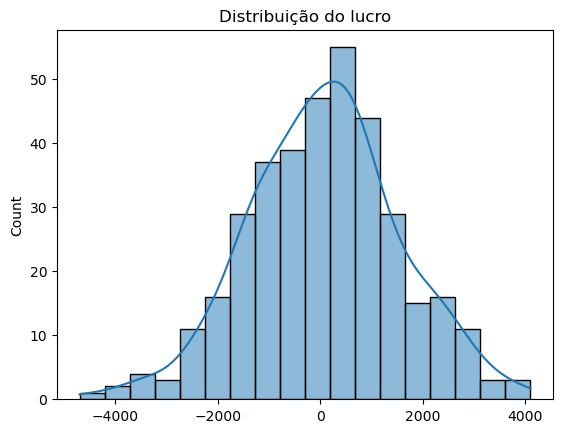

In [160]:
# Visualizando a Distribuição
sns.histplot(lucro, kde=True)
plt.title('Distribuição do lucro')
plt.show()

In [161]:
# vamos simular 365 dias
n1 = 55
p1 = 0.05
lucro1 = []
for i in range(365):
    sucessos_ligacoes1 = np.random.binomial(n1, p1, size=funcionarios)
    lucro1.append(np.sum(sucessos_ligacoes1)*receita - funcionarios*salarios)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_884\191462722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lucro1)


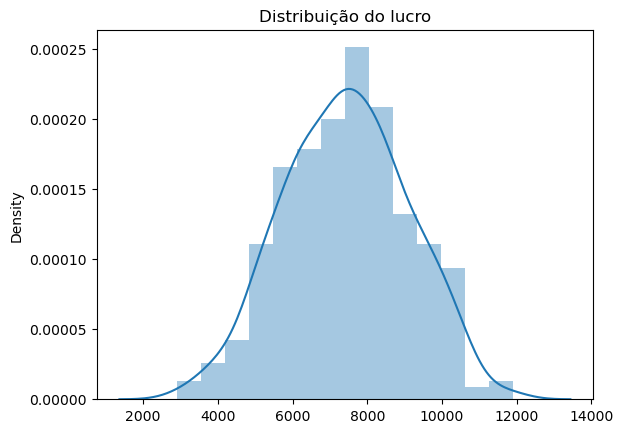

In [162]:
sns.distplot(lucro1)
plt.title('Distribuição do lucro')
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_884\535824830.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(lucro, bins=20, label='Call Center antes do cientista de dados')
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_884\535824830.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distpl

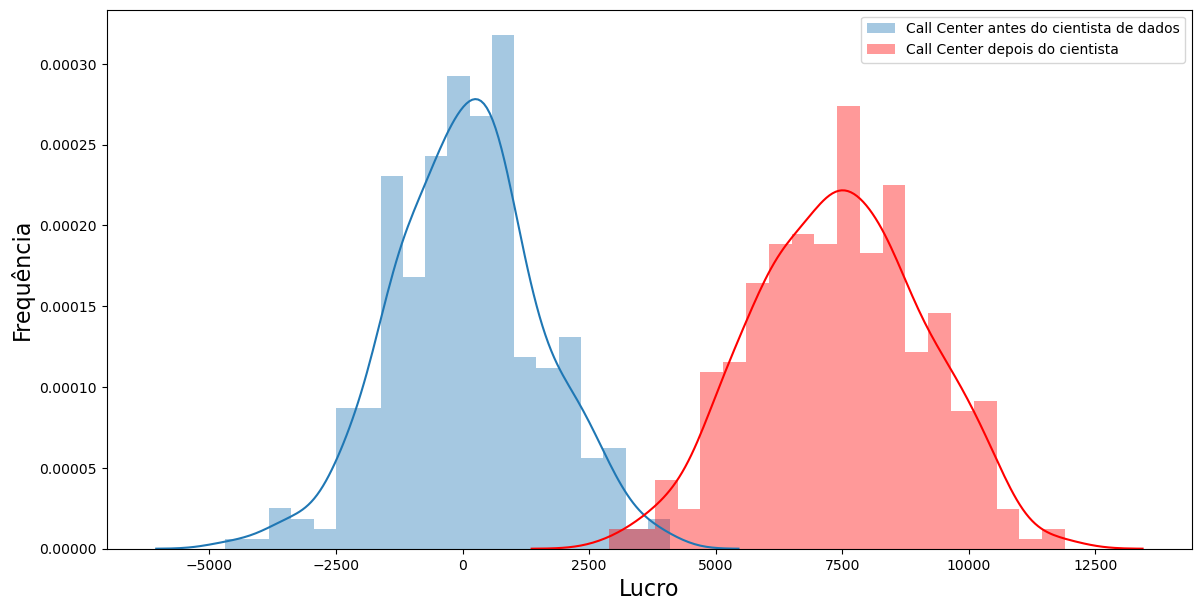

In [163]:
# Plot and save the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(lucro, bins=20, label='Call Center antes do cientista de dados')
ax = sns.distplot(lucro1, bins=20, label='Call Center depois do cientista', color='red')
ax.set_xlabel("Lucro",fontsize=16)
ax.set_ylabel("Frequência",fontsize=16)
plt.legend()
plt.show()

## Distribuições Contínuas

### Distribuição Normal

![](https://i.pinimg.com/originals/34/9b/f6/349bf66317f5a051c89a7b26264c9062.jpg)

A ``distribuição normal`` ou ``Gaussiana`` é uma das mais importantes distribuições teóricas e práticas. Ela é muito utilizada na **inferência estatística**. A função **f(x)** é uma ``curva simétrica``,** unimodal com forma de sino** que, quando ``μ=0`` e ``σ=1``, ela descreve uma distribuição denominada ``Normal padrão`` ou ``Normal reduzida``.

A ``Distribuição Normal`` é uma ``distribuiçao contínua`` e é uma das mais conhecidas na estatística e na ciência de dados. Isso, pois muitos fenômenos podem ser modelados por meio de uma **distribuição normal**. Matematicamente, uma distribuição é normal se segue a seguinte função de **densidade de probabilidade**. 

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/362834b765239b64cf7719a3a3a04e172c883e3d)

O que é densidade de probabilidade? Por qual motivo não utilizamos um valor de probabilidade?

Pra definir essa função, precisamos de uma **média*, representada pela letra grega ``mi`` e um **desvio padrão**, representado pela letra grega ``sigma``.

Diferentemente da **Função de Massa de Probabilidade**, essa Função **não retorna a probabilidade**, mas um **valor correspondente** ao que se conhece por **densidade**. Para **calcular a probabilidade** temos que encontrar a ``área dentro do intervalo`` especificado.

Diferentemente da Função de **Massa de Probabilidade**, essa Função não **retorna** a probabilidade, mas um **valor** correspondente ao que se conhece por **densidade**. Para **calcular a probabilidade** temos que encontrar a área dentro do intervalo especificado.

![](https://statistics.laerd.com/statistical-guides/img/normal-7.png)

Características interessantes:

- A curva é simétrica em relação a média
- A média, a moda e a mediana são iguais

**Relembrar agora do BoxPLot:**

![](https://jingwen-z.github.io/images/20190319-boxplot-vs-pdf.png)

* O ``IQR`` nos ajuda a localizar **outliers na distribuição**.

### Distribuição Normal Padrão


A ``distribuição normal`` com **média nula** e **desvio padrão** unitário é chamada de ``distribuição normal centrada e reduzida`` ou de ``distribuição normal padrão``.


![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRKw5o96x3h5uI4_-LC9l-MANxreLjcFB_QdQ&usqp=CAU)

In [164]:
# Craindo dados sinteticos para exemplificação
normal_dist = np.random.normal(50, 5, 3000)

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_884\1155739972.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normal_dist)


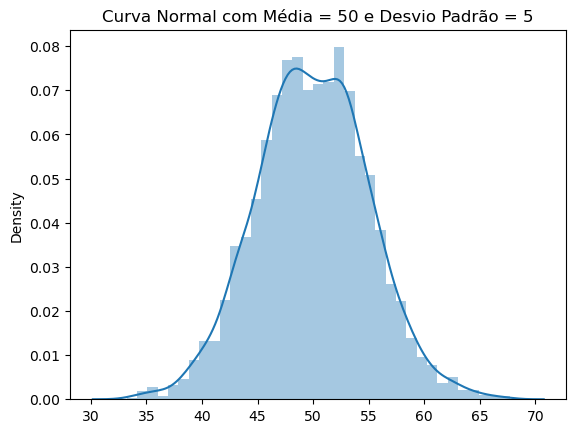

In [165]:
# Plotando os dados em um grafico de distribuição
sns.distplot(normal_dist)
plt.title('Curva Normal com Média = 50 e Desvio Padrão = 5')
plt.show()

In [166]:
# media 
media_normal = normal_dist.mean()
# desvio 
desvio_normal = normal_dist.std()
# padronização
z_normal_dist = (normal_dist - media_normal)/desvio_normal
print(media_normal,desvio_normal)

49.94719591354585 5.023433296775534


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_884\902802711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_normal_dist)


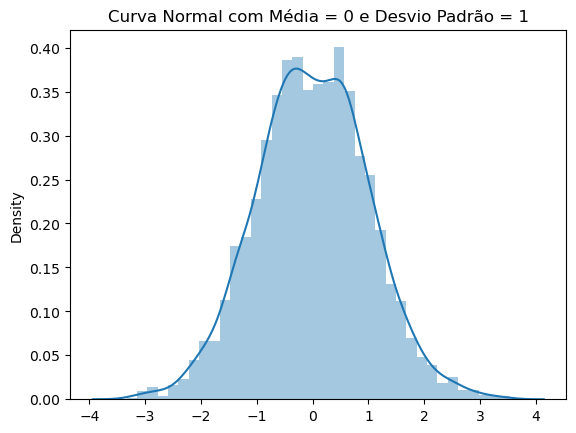

In [167]:
sns.distplot(z_normal_dist)
plt.title('Curva Normal com Média = 0 e Desvio Padrão = 1')
plt.show()

Se quisermos saber, por exemplo, qual a **probabilidade de observarmos** valores menores que 45, transformamos 45 para ``Z score`` e usamos a função ```stats.norm.cdf``` para **obter a probabilidade**.

Antes disso, vamos ver como o **python** vai nos **retornar as probabilidades**

![](https://i.stack.imgur.com/fGYNp.png)

Acima temos uma ``curva normal padrão`` e temos um valor de ``x`` igual a **1.645**, que é o ``Z score``. Se quisermos descobrir a **probabilidade** de encontrarmos um **valor < 1.645**, usamos a função ``stats.norm.cdf``, passando como argumento o valor do ``Z score``.

In [168]:
# Extraindo a probabilidade por meio de uma distribuição nomalizada
stats.norm.cdf(1.645)
# Obtendo a probabiliodade de observar valores menores que "1.645"

0.9500150944608786

Note que a **probabilidade** de encontrarmos um **valor abaixo de 1.645** na ``curva normal padrão`` é de **95%**

Se quisermos **saber o inverso**.

In [169]:
# Extraindo o valor de Z-Score
stats.norm.ppf(0.95)
# Aplicando a operação inversa anterior 

1.6448536269514722

Sendo assim, vamos calcular o ``Z score`` de **45** e usar a função ``stats.norm.cdf()``

In [170]:
# Obtendo o  "Z-score para 45"
z_45 = ( 45 - media_normal ) / desvio_normal
stats.norm.cdf(z_45)

0.16235535087010838